# APLICACIÓN DE MODELOS MACHINE LEARNING PARA LA DETECCION DE FRAUDE CON TARJETA DE CREDITO


# Estudiante: Eguivar Villca Shirley Carminia 

In [912]:
#libraries

In [913]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [914]:
from sklearn.model_selection import train_test_split

In [915]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report

In [916]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1.- Loading the dataset

In [917]:
# Read dataset
dataset = pd.read_csv('creditcard.csv')
dataset.describe()
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2.-  Exploratory Data Analisys

In [918]:
# Initial shape
dataset.shape

(284807, 31)

In [919]:
# Maximum value for each column
dataset.max()

Time      172792.000000
V1             2.454930
V2            22.057729
V3             9.382558
V4            16.875344
V5            34.801666
V6            73.301626
V7           120.589494
V8            20.007208
V9            15.594995
V10           23.745136
V11           12.018913
V12            7.848392
V13            7.126883
V14           10.526766
V15            8.877742
V16           17.315112
V17            9.253526
V18            5.041069
V19            5.591971
V20           39.420904
V21           27.202839
V22           10.503090
V23           22.528412
V24            4.584549
V25            7.519589
V26            3.517346
V27           31.612198
V28           33.847808
Amount     25691.160000
Class          1.000000
dtype: float64

In [920]:
#minimum value for each column
dataset.min()

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64

In [921]:
# Percentage of null values
# we can see we dont have NULL values
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


# Checking the target classes

No Fraude : 99.83 %
Fraude : 0.17 %


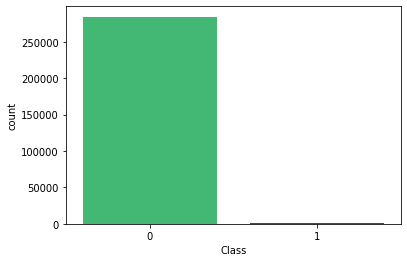

In [922]:
print('No Fraude :', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '%')
print('Fraude :', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '%')
sns.countplot('Class',data=dataset, palette=["#2ecc71","#34495e"])

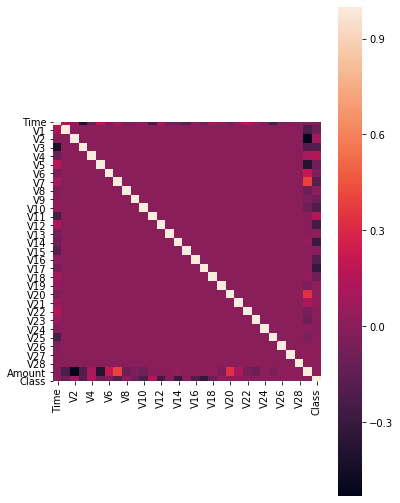

In [923]:
# Correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(6, 9))
sns.heatmap(corrmat, vmax=1, square=True);

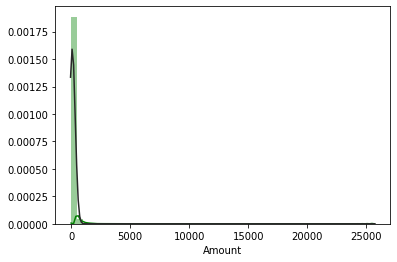

<Figure size 432x288 with 0 Axes>

In [924]:
# Amount column
sns.distplot(dataset['Amount'], fit=norm ,color ="green")
fig = plt.figure()


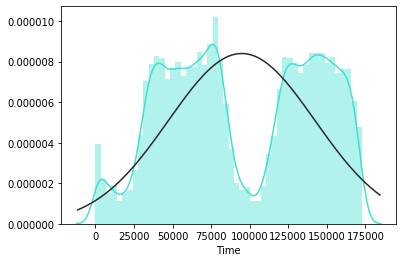

<Figure size 432x288 with 0 Axes>

In [925]:
# Time column
sns.distplot(dataset['Time'], fit=norm , color ="turquoise")
fig = plt.figure()

# 3 Data Cleaning

# 3.1 Undersampling

In [926]:
dataset = dataset.sample(frac=1)

# Divide by class: amount of fraud classes 492 rows.
fraud_df = dataset.loc[dataset['Class'] == 1]
no_fraud_df = dataset.loc[dataset['Class'] == 0]#[:492]

# Random under-sampling
df_class_0_under = no_fraud_df.sample(492)
df_test_under = pd.concat([df_class_0_under, fraud_df], axis=0)

#new dataframe
new_df = df_test_under

print('Random under-sampling:')
#print(new_df.Class.value_counts())
target_count = new_df.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


Random under-sampling:
Class 0: 492
Class 1: 492
Proportion: 1.0 : 1


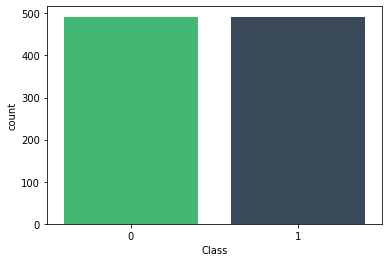

In [927]:
sns.countplot('Class',data=new_df, palette=["#2ecc71","#34495e"])
plt.show()



In [928]:
#new dataframe balanced
new_df = df_test_under
new_df.head()
new_df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,85088.648374,-2.408304,1.845099,-3.520797,2.319391,-1.619746,-0.674145,-2.800099,0.295266,-1.275308,...,0.353195,0.021900,-0.020108,-0.056288,0.038214,0.020094,0.090237,0.037077,107.397246,0.500000
std,47369.370088,5.530021,3.709993,6.233346,3.183885,4.221284,1.781718,5.874080,4.891636,2.329382,...,2.808070,1.170306,1.185030,0.565133,0.672441,0.475114,1.015962,0.454756,298.733731,0.500254
min,406.000000,-30.552380,-15.902851,-31.103685,-4.045333,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.322761,-7.263482,-2.360091,0.000000,0.000000
25%,43472.500000,-2.897289,-0.094982,-5.138122,-0.014722,-1.869139,-1.582428,-3.184085,-0.193924,-2.324444,...,-0.162935,-0.517262,-0.238545,-0.403443,-0.310368,-0.302697,-0.062122,-0.063361,1.510000,0.000000
50%,76835.500000,-0.813508,0.974183,-1.381956,1.394949,-0.418908,-0.628499,-0.673840,0.175831,-0.664042,...,0.146160,0.038201,-0.041706,0.009216,0.059745,-0.033353,0.041833,0.032905,20.330000,0.500000
75%,129775.000000,1.047157,2.873792,0.350879,4.291055,0.421845,0.106921,0.254313,0.922553,0.191604,...,0.662005,0.594320,0.178412,0.373124,0.415303,0.325954,0.455031,0.215850,97.995000,1.000000
max,171867.000000,2.314261,22.057729,3.537292,12.114672,11.095089,11.139726,15.296867,20.007208,6.826191,...,27.202839,8.361985,7.300682,1.279453,2.208209,2.745261,4.627655,4.957651,4901.000000,1.000000


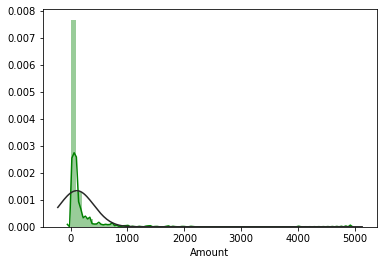

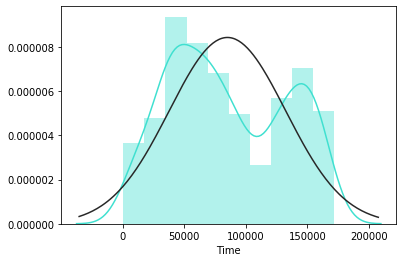

<Figure size 432x288 with 0 Axes>

In [929]:
sns.distplot(new_df['Amount'], fit=norm ,color ="green")
fig = plt.figure()
sns.distplot(new_df['Time'], fit=norm , color ="turquoise")
fig = plt.figure()

# 4 Machine Learning Models

In [930]:
#Set target attribute  
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Split data into training and test
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

print ('Number of transactions train dataset: ', len(X_train))
print ('Number of transactions test dataset: ', len(X_test))
print ('Total number of transactions: ', len(X_train)+len(X_test))
X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values

Number of transactions train dataset:  688
Number of transactions test dataset:  296
Total number of transactions:  984


In [931]:
#pip install mlxtend

# 4.1 Logistic Regression

In [945]:
model_LogisticRegression = LogisticRegression()

In [946]:
#Trainning
model_LogisticRegression.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [947]:
# Predicting
y_pred = model_LogisticRegression.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(15)

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,0,1
8,1,1
9,1,1


# Learning Curve 

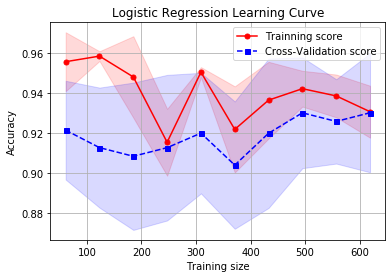

In [948]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model_LogisticRegression,
                        X=X_train, y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# graficando las curvas
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Trainning score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Cross-Validation score')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Logistic Regression Learning Curve')
plt.legend(loc='upper right')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

Confusion matrix: Logistic Regression
[[142  10]
 [ 10 134]]


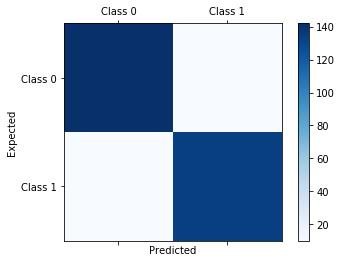

In [949]:
#Confusion matrix
print("Confusion matrix: Logistic Regression")
conf_mat=confusion_matrix(y_test, y_pred)
print(conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Metrics

In [950]:
# Metrics by Training and Test
print ('Metrics with train dataset: ')
train_pred = model_LogisticRegression1.predict(X_train)
print (classification_report(y_train, train_pred))
print ('Metrics with test dataset: ')
test_pred = model_LogisticRegression1.predict(X_test)
print (classification_report(y_test, test_pred))

Metrics with train dataset: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       340
           1       0.95      0.92      0.94       348

    accuracy                           0.94       688
   macro avg       0.94      0.94      0.94       688
weighted avg       0.94      0.94      0.94       688

Metrics with test dataset: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       152
           1       0.93      0.93      0.93       144

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [951]:
#print ('Score with test data set: ', model_LogisticRegression.score(X_test, y_test))
#print ('Score with train data set: ', model_LogisticRegression.score(X_train, y_train))

In [952]:
accuracy = metrics.accuracy_score(y_pred,y_test)
print("accuracy:",accuracy) 
precision = metrics.precision_score(y_pred,y_test)
print("precision:",precision) 
f1_score = metrics.f1_score(y_pred,y_test)
print("f1_score:",f1_score) 
recall_score = metrics.recall_score(y_pred,y_test)
print("recall_score/sensitivity:",recall_score) 

accuracy: 0.9324324324324325
precision: 0.9305555555555556
f1_score: 0.9305555555555556
recall_score/sensitivity: 0.9305555555555556


# 4.2 Decision Tree

In [904]:
model_DecisionTree = DecisionTreeClassifier()

In [905]:
#Trainning
model_DecisionTree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [906]:
# Predicting
y_pred = model_DecisionTree.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(15)

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,1,1


# Learning Curve

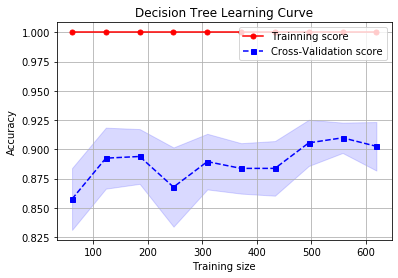

In [907]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model_DecisionTree,
                        X=X_train, y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# graficando las curvas
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Trainning score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Cross-Validation score')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Decision Tree Learning Curve')
plt.legend(loc='upper right')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

Confusion matrix: Decision Tree
[[142  10]
 [ 15 129]]


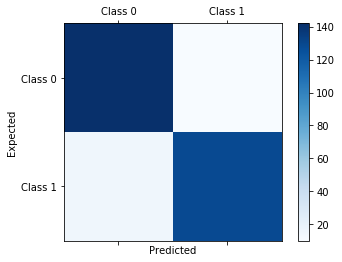

In [908]:
#Confusion matrix
print("Confusion matrix: Decision Tree")
conf_mat=confusion_matrix(y_test, y_pred)
print(conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Metrics

In [909]:
# Metrics by Training and Test
print ('Metrics with train dataset: ')
train_pred = model_DecisionTree.predict(X_train)
print (classification_report(y_train, train_pred))
print ('Metrics with test dataset: ')
test_pred = model_DecisionTree.predict(X_test)
print (classification_report(y_test, test_pred))

Metrics with train dataset: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       348

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

Metrics with test dataset: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       152
           1       0.93      0.90      0.91       144

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [910]:
print ('Score with test data set: ', model_DecisionTree.score(X_test, y_test))
print ('Score with train data set: ', model_DecisionTree.score(X_train, y_train))

Score with test data set:  0.9155405405405406
Score with train data set:  1.0


In [911]:
accuracy = metrics.accuracy_score(y_pred,y_test)
print("accuracy:",accuracy) 
precision = metrics.precision_score(y_pred,y_test)
print("precision:",precision) 
f1_score = metrics.f1_score(y_pred,y_test)
print("f1_score:",f1_score) 
recall_score = metrics.recall_score(y_pred,y_test)
print("recall_score/sensitivity:",recall_score) 

accuracy: 0.9155405405405406
precision: 0.8958333333333334
f1_score: 0.9116607773851589
recall_score/sensitivity: 0.9280575539568345


# Conclusion